# Planning data vitualisation

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

## Read CSV

In [2]:
df = pd.read_csv('data/VBA-DataVic-Building-Permits-2018.csv')
df.head(3)

,permit_stage_number,permit_date,BASIS_Month_Y,BASIS_Month_M,Reported_Levy_amount,Calculated_Levy_amount,Reported_Cost_of_works,Site_street,Site_suburb,site_pcode,...,BACV_applicable_flag,Calculated_levy_BACV,solar_hot_water,rainwater_tank,est_cost_project,BASIS_Zone,BASIS_NOW,BASIS_BCA,BASIS_OwnershipSector,BASIS_OwnerBuilder
0,0,23-Jun-14,2018,1,$0.00,$0.00,"$3,607.00",BOURKE STREET,MELBOURNE,3000,...,1,$0.00,0.0,0.0,"$3,607.00",Industrial,3,8,P,NaN
1,0,11-Jan-17,2018,1,$15.80,$15.78,"$12,330.00",RAE ST,COLAC,3250,...,1,$7.89,0.0,0.0,"$12,330.00",Domestic,1,10A,P,-1.0
2,1,29-Jan-17,2018,1,$49.28,$49.28,"$38,500.00",PARK STREET,SOUTH YARRA,3141,...,1,$24.64,0.0,0.0,"$1,785,810.00",Domestic,6,1A,P,0.0

















## Create dataframe that use Zone as colume, suburb as index

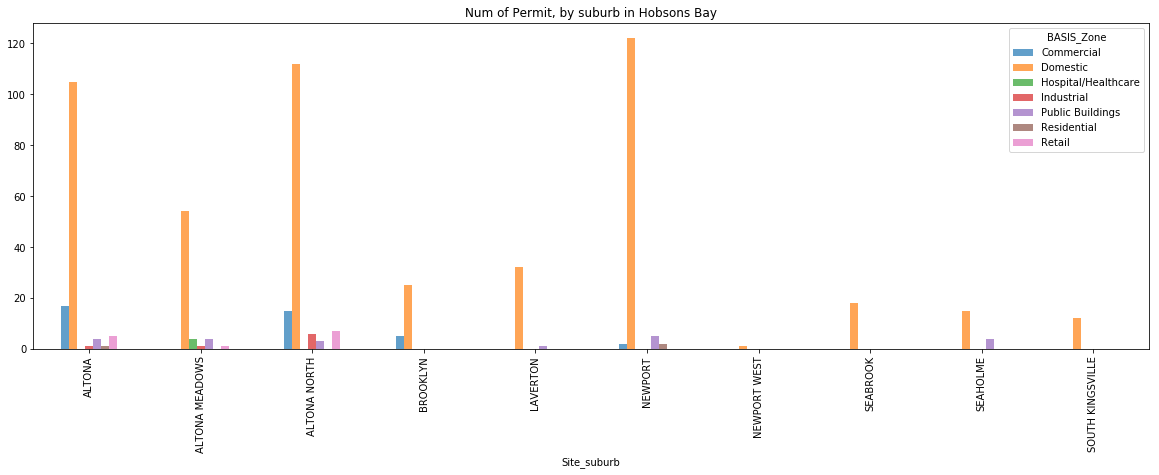

In [5]:
df_casey = df[df['Municipal Name']=='Hobsons Bay'] # pandas.core.frame.DataFrame

permit_count = df_casey.groupby(['Site_suburb', 'BASIS_Zone']).size().to_frame()

df_count = permit_count.unstack(level=1)

df_count.columns = df_count.columns.droplevel(0)
df_head = df_count.head(10)

ax = df_head.plot(figsize=[20, 6], kind='bar', alpha=0.7, title='Num of Permit, by suburb in Hobsons Bay')


## Without Domestic

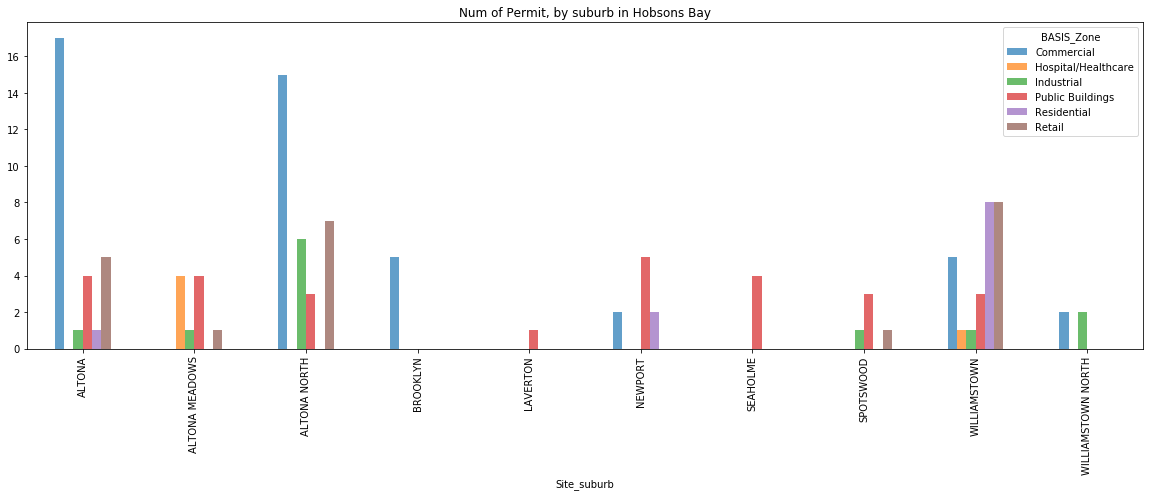

In [6]:
df_casey = df[df['Municipal Name']=='Hobsons Bay']


df_zone = df_casey[(df_casey['BASIS_Zone']!='Domestic')]

permit_count = df_zone.groupby(['Site_suburb', 'BASIS_Zone']).size().to_frame()

df_count = permit_count.unstack(level=1)

df_count.columns = df_count.columns.droplevel(0)
df_head = df_count.head(10)

ax = df_head.plot(figsize=[20, 6], kind='bar', alpha=0.7, title='Num of Permit, by suburb in Hobsons Bay')
